In [1]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-07-21 12:44:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.09MB/s    in 55s     

2020-07-21 12:45:06 (5.57 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
base_path='/content/rockpaperscissors'
os.listdir(base_path)

['rps-cv-images', 'scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [4]:
!rm -R 'rockpaperscissors/rps-cv-images'

In [5]:
os.listdir(base_path)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers

In [7]:
print(tf.__version__)

2.2.0


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    shear_range=0.15,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=20,
                    epochs=30,
                    validation_steps=10,
                    validation_data=validation_generator)

Epoch 1/30
20/20 [==============================] - 26s 1s/step - loss: 1.1981 - accuracy: 0.3594 - val_loss: 1.1336 - val_accuracy: 0.3125
Epoch 2/30
20/20 [==============================] - 26s 1s/step - loss: 1.0761 - accuracy: 0.4109 - val_loss: 1.0067 - val_accuracy: 0.5063
Epoch 3/30
20/20 [==============================] - 25s 1s/step - loss: 1.0380 - accuracy: 0.4672 - val_loss: 0.9998 - val_accuracy: 0.4812
Epoch 4/30
20/20 [==============================] - 26s 1s/step - loss: 0.9247 - accuracy: 0.5500 - val_loss: 0.8567 - val_accuracy: 0.5625
Epoch 5/30
20/20 [==============================] - 25s 1s/step - loss: 0.6773 - accuracy: 0.7213 - val_loss: 0.6284 - val_accuracy: 0.7531
Epoch 6/30
20/20 [==============================] - 25s 1s/step - loss: 0.5223 - accuracy: 0.7967 - val_loss: 0.5191 - val_accuracy: 0.8156
Epoch 7/30
20/20 [==============================] - 26s 1s/step - loss: 0.5300 - accuracy: 0.7885 - val_loss: 0.5792 - val_accuracy: 0.7437
Epoch 8/30
20/20 [==

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

28/28 - 11s - loss: 0.0981 - accuracy: 0.9703


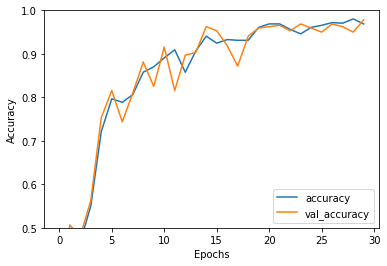

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

Saving IMG_20200720_174131.jpg to IMG_20200720_174131.jpg
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
IMG_20200720_174131.jpg
[0]
paper


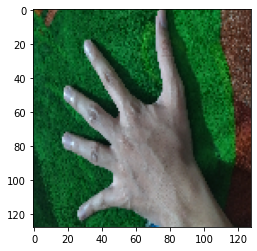

In [24]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=10)

  print(fn)
  print(classes)
  if (classes==[0]).all():
    print('paper')
  elif (classes==[1]).all():
    print('rock')
  elif (classes==[2]).all():
    print('scissors')

Saving IMG_20200720_173356.jpg to IMG_20200720_173356.jpg
IMG_20200720_173356.jpg
[1]
Rock


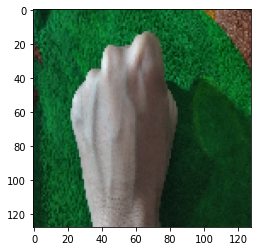

In [25]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=10)
  
  print(fn)  
  print(classes)
  if (classes==[0]).all():
    print('Paper')
  elif (classes==[1]).all():
    print('Rock')
  elif (classes==[2]).all():
    print('Scissors')

Saving IMG_20200720_174119.jpg to IMG_20200720_174119.jpg
IMG_20200720_174119.jpg
[2]
Scissors


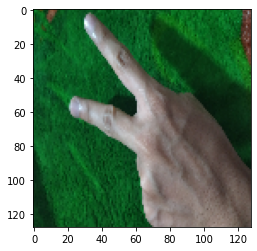

In [26]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=10)
  
  print(fn)  
  print(classes)
  if (classes==[0]).all():
    print('Paper')
  elif (classes==[1]).all():
    print('Rock')
  elif (classes==[2]).all():
    print('Scissors')